In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [2]:
import csv

filename = '/kaggle/input/iris-dataset/iris.csv'

with open(filename, "r") as file:
    reader = csv.reader(file)
    header = next(reader)
    data = [row for row in reader]

print("Headers:", header)
print("First 5 rows:")
for row in data[:5]:
    print(row)


Headers: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
First 5 rows:
['5.1', '3.5', '1.4', '0.2', 'setosa']
['4.9', '3.0', '1.4', '0.2', 'setosa']
['4.7', '3.2', '1.3', '0.2', 'setosa']
['4.6', '3.1', '1.5', '0.2', 'setosa']
['5.0', '3.6', '1.4', '0.2', 'setosa']


In [3]:
numeric_data = []
for row in data:
    numeric_row = list(map(float, row[:4]))
    numeric_data.append(numeric_row)

columns = list(zip(*numeric_data))

for i, col in enumerate(columns):
    print(f"{header[i]}: min={min(col):.2f}, max={max(col):.2f}, mean={sum(col)/len(col):.2f}")

sepal_length: min=4.30, max=7.90, mean=5.84
sepal_width: min=2.00, max=4.40, mean=3.05
petal_length: min=1.00, max=6.90, mean=3.76
petal_width: min=0.10, max=2.50, mean=1.20


In [4]:
from collections import Counter

species_col = [row[4] for row in data]
class_counts = Counter(species_col)

print("Species distribution: ")
for species, count in class_counts.items():
    print(f"{species}: {count}")

Species distribution: 
setosa: 50
versicolor: 50
virginica: 50


In [5]:
label_map = {"setosa": 0, "versicolor" : 1, "virginica": 2}
X = []
y = []

for row in data:
    features = list(map(float, row[:4]))
    label = label_map[row[4]]
    X.append(features)
    y.append(label)
print("First 3 samples (X, y):")
for i in range(3):
    print(X[i], y[i])

First 3 samples (X, y):
[5.1, 3.5, 1.4, 0.2] 0
[4.9, 3.0, 1.4, 0.2] 0
[4.7, 3.2, 1.3, 0.2] 0


In [6]:
missing_counts = [0] * len(header)

for row in data:
    for i, val in enumerate(row):
        if val.strip() == "" or val.strip().lower() in ['na', 'null', 'none']:
            missing_counts[i] += 1
print("Missing values per column: ")
for i, count in enumerate(missing_counts):
    print(f"{header[i]}: {count}")

Missing values per column: 
sepal_length: 0
sepal_width: 0
petal_length: 0
petal_width: 0
species: 0


In [7]:
unique_rows = set()
duplicates = []

for row in data:
    row_tuple = tuple(row)
    if row_tuple in unique_rows:
        duplicates.append(row)
    else:
        unique_rows.add(row_tuple)

print(f"Total rows: {len(data)}")
print(f"Duplicate rows found: {len(duplicates)}")

Total rows: 150
Duplicate rows found: 3


In [8]:
clean_data = [list(row) for row in unique_rows]
print(f"Cleaned dataset size : {len(clean_data)}")

Cleaned dataset size : 147


In [9]:

buckets = [0] * 7  

for row in numeric_data:
    val = row[2]  
    index = int(val)
    if index < len(buckets):
        buckets[index] += 1

print("Petal Length Distribution:")
for i, count in enumerate(buckets):
    print(f"{i}-{i+1}: {'█' * count} ({count})")


Petal Length Distribution:
0-1:  (0)
1-2: ██████████████████████████████████████████████████ (50)
2-3:  (0)
3-4: ███████████ (11)
4-5: ███████████████████████████████████████████ (43)
5-6: ███████████████████████████████████ (35)
6-7: ███████████ (11)


In [10]:
for species, count in class_counts.items():
    print(f"{species:10}: {'█' * count} ({count})")


setosa    : ██████████████████████████████████████████████████ (50)
versicolor: ██████████████████████████████████████████████████ (50)
virginica : ██████████████████████████████████████████████████ (50)


In [11]:
import math

def euclidean_distance(a, b):
    return math.sqrt(sum((x-y)** 2 for x, y in zip (a, b)))

In [12]:
from collections import Counter

def knn_predict(X_train, y_train, test_point, k=3):
    distances = []

    for features, label in zip(X_train, y_train):
        dist = euclidean_distance(features, test_point)
        distances.append((dist, label))

    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    most_common = Counter(k_nearest_labels).most_common(1)[0][0]
    return most_common


In [13]:
correct = 0
total = len(X)

for features, label in zip(X, y):
    pred = knn_predict(X, y, features, k=3)
    if pred == label:
        correct += 1

accuracy = correct / total
print(f"accuracy (KNN from scratch) : {accuracy:.2f}")

accuracy (KNN from scratch) : 0.96


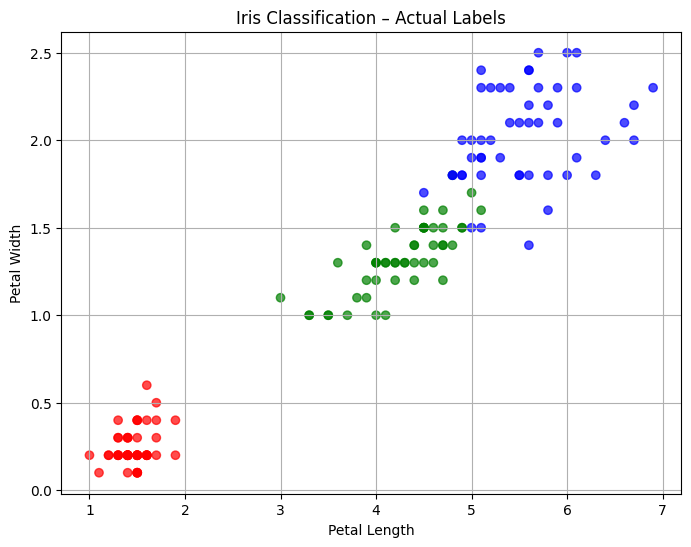

In [14]:
import matplotlib.pyplot as plt


label_map_reverse = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
species_colors = ['red', 'green', 'blue']
colors = [species_colors[label] for label in y]


X_petal = [row[2:4] for row in X]

x_vals = [row[0] for row in X_petal]
y_vals = [row[1] for row in X_petal]

plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, c=colors, alpha=0.7)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Classification – Actual Labels")
plt.grid(True)
plt.show()


In [15]:
y_binary = [1 if label == 0  else 0 for label in y]
X_binary = [x[:2] for x in X]

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic(X, y, lr=0.1, epochs=1000):
    X = np.array(X)
    y = np.array(y)
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)

        weights -= lr * dw
        bias -= lr * db

    return weights, bias

In [17]:
def predict(X, weights, bias):
    linear = np.dot(X, weights) + bias
    probs = sigmoid(linear)
    return [1 if p >= 0.5 else 0 for p in probs]


weights, bias = train_logistic(X_binary, y_binary)


y_pred = predict(np.array(X_binary), weights, bias)


correct = sum(p == t for p, t in zip(y_pred, y_binary))
accuracy = correct / len(y_binary)
print(f"Accuracy (Logistic Regression from scratch): {accuracy:.2f}")

Accuracy (Logistic Regression from scratch): 0.99


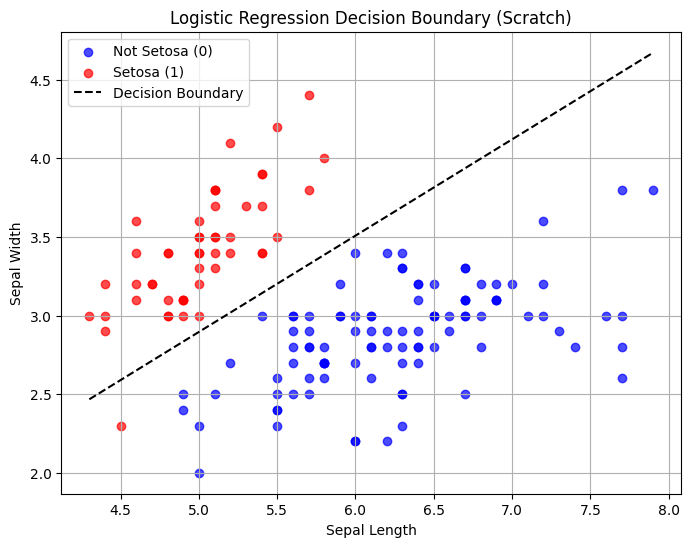

In [18]:
X_np = np.array(X_binary)
y_np = np.array(y_binary)


class_0 = X_np[y_np == 0]
class_1 = X_np[y_np == 1]

plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Not Setosa (0)', alpha=0.7)
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Setosa (1)', alpha=0.7)


x1_vals = np.linspace(min(X_np[:, 0]), max(X_np[:, 0]), 100)
x2_vals = -(weights[0] * x1_vals + bias) / weights[1]

plt.plot(x1_vals, x2_vals, color='black', linestyle='--', label='Decision Boundary')

# Labels
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Logistic Regression Decision Boundary (Scratch)")
plt.legend()
plt.grid(True)
plt.show()


In [19]:



X_binary = [[5.1, 3.5], [6.2, 2.8], [4.9, 3.0]]  
y_binary = [1, 0, 1]  # 1 = Setosa, 0 = Not Setosa


output_path = "/kaggle/working/iris_binary_cleaned.csv"


with open(output_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['sepal_length', 'sepal_width', 'is_setosa'])  # header
    for x_row, y_label in zip(X_binary, y_binary):
        writer.writerow(x_row + [y_label])

print(f"Saved to: {output_path}")


Saved to: /kaggle/working/iris_binary_cleaned.csv
